<a href="https://colab.research.google.com/github/drawcodeboy/first_ML_DL/blob/main/firstMLDL_07_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANN Model Training
>* 훈련을 시킬 때 여러 가지 방법
>* history, fit을 시켜서 반환되는 history 클래스를 통해 에포크마다 도출된 값을 확인할 수 있음
>* validation set loss, train_set에 overfitting 되는 것을 막기 위해 fit에 validation_data를 전달해 validation_data에 대한 accuracy, loss를 확인할 수 있음
>* Dropout, overfitting이 되는 것을 막기 위해 일부 뉴런의 출력을 랜덤하게 끔으로써 특정 뉴런에 의존하는 것을 막는다. keras에서 층처럼 사용 가능
>* Callback, 모델이 훈련하는 도중 다른 작업을 수행하는 것을 말함
>* 1) ModelCheckpoint, 원하는 특정 지점에서 모델을 저장할 수 있음
>* 2) EarlyStopping, overfitting이 되지 않도록 patience를 조절함으로써 조기 종료 가능, 몇 번의 에포크를 돌리더라도 특정 조건에서 멈추게 하기 때문에 자원 낭비를 줄일 수 있다. EarlyStopping을 하면 특정 매개변수를 통해 원하는 시점의 모델을 가져올 수 있다.

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

4431872/4422102 [==============================] - 0s 0us/step


In [2]:
# 케라스 모델 만드는 함수
# 레이어를 추가하면 100 뉴런 층과 10 뉴런 사이의 층을 넣어 모델을 생성

def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [ ]:
model = model_fn()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)
# verbose = 훈련 과정 출력을 조절
# 0 = 나타내지 않음
# 1 = 진행 막대, 손실 등의 지표
# 2 = 진행 막대를 제외한 나머지 지표

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


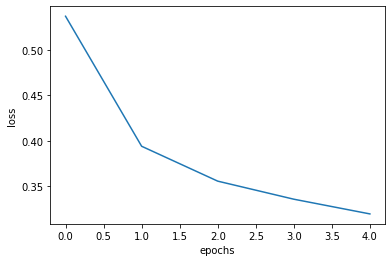

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [ ]:
# epochs를 20번으로 늘려서 학습
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5272 - accuracy: 0.8139
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3955 - accuracy: 0.8567
Epoch 3/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3561 - accuracy: 0.8728
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3325 - accuracy: 0.8812
Epoch 5/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3176 - accuracy: 0.8867
Epoch 6/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3082 - accuracy: 0.8910
Epoch 7/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3000 - accuracy: 0.8937
Epoch 8/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2918 - accuracy: 0.8972
Epoch 9/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2827 - accuracy: 0.9015
Epoch 10/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.278

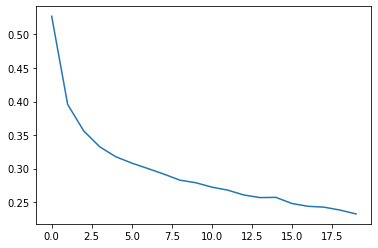

In [ ]:
plt.plot(history.history['loss'])
plt.show()

# 손실은 줄어들지만 overfitting이 되지 않을까?

In [ ]:
model = model_fn()

# validation set마저 fit해서 epoch 얼마까지가 overfitting을 일으키는지
# plt를 통해 확인
# 매개변수를 통해 validation_data에 할당
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

In [ ]:
# history에 어떤 key가 담겨져있는지 확인
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


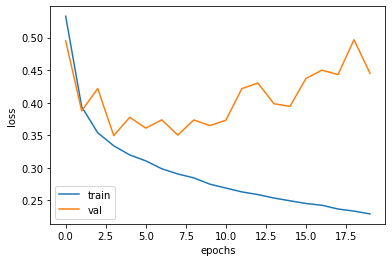

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# epoch 5부터 validation_set에 대한 loss 값이 올라간다.
# optimizer의 Learning Rate나 optimizer의 종류에 대해 의심해볼 수 있다.

In [ ]:
# optimizer를 RMSprop에서 Adam으로 변경
model = model_fn()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

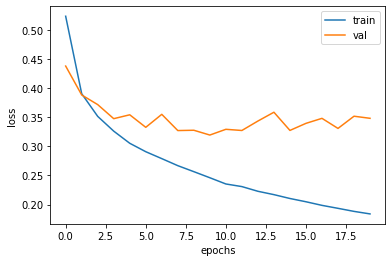

In [ ]:
# Optimizer RMSprop -> adam

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
          validation_data=(val_scaled, val_target))

In [ ]:
# 모델 저장 및 복원

model.save_weights('model-weights.h5')

In [ ]:
model.save('model-whole.h5')

In [ ]:
!ls -al *.h5

-rw-r--r-- 1 root root 333272 Sep  9 01:42 model-weights.h5
-rw-r--r-- 1 root root 982568 Sep  9 01:42 model-whole.h5


In [ ]:
# 모델 파라미터 가져오기
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 100)               78500     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_13 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 가져온 모델 파라미터로 accuracy를 계산해야한다.
# 그렇지만 accuracy를 가져오려면 evaluate를 써야하는데
# evaluate를 하려면 compile을 해야한다.
# accruacy만 가져오면 되기 때문에 numpy를 이용해 직접 연산한다.

import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis=-1) # axis=-1, 마지막 차원
print(np.mean(val_labels == val_target))

0.8913333333333333


In [ ]:
# 모델을 가져오는 것만으로는 compile이 필요하지 않는 이유는
# 모델 파라미터 뿐만 아니라 모델 구조, 옵티마이저, Loss function 등
# 모든 것을 가져오기 때문이다.

# 하지만, tensorflow2.3부터는 load_model의 버그 때문에
# evaluate 메서드를 사용하기 전에 compile을 해야 한다.

model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3326 - accuracy: 0.8913


[0.33259129524230957, 0.8913333415985107]

In [4]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',
                                                save_best_only=True)
model.fit(train_scaled, train_target, epochs=20,
          validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb])

Epoch 1/20
1500/1500 [==============================] - 8s 3ms/step - loss: 0.5223 - accuracy: 0.8175 - val_loss: 0.4365 - val_accuracy: 0.8432
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3957 - accuracy: 0.8575 - val_loss: 0.3793 - val_accuracy: 0.8652
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3525 - accuracy: 0.8720 - val_loss: 0.3801 - val_accuracy: 0.8648
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3258 - accuracy: 0.8815 - val_loss: 0.3498 - val_accuracy: 0.8767
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3089 - accuracy: 0.8856 - val_loss: 0.3859 - val_accuracy: 0.8555
Epoch 6/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2927 - accuracy: 0.8915 - val_loss: 0.3320 - val_accuracy: 0.8792
Epoch 7/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2797 - accuracy: 0.8968 - val_loss: 0.3338 - val_accuracy:

In [6]:
print(checkpoint_cb)
checkpoint_cb

In [7]:
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3241 - accuracy: 0.8829


[0.3241369426250458, 0.8829166889190674]

In [10]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20,
          validation_data=(val_scaled, val_target), 
          callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5237 - accuracy: 0.8165 - val_loss: 0.4249 - val_accuracy: 0.8502
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3955 - accuracy: 0.8575 - val_loss: 0.3912 - val_accuracy: 0.8608
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3535 - accuracy: 0.8716 - val_loss: 0.3668 - val_accuracy: 0.8698
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3277 - accuracy: 0.8810 - val_loss: 0.3636 - val_accuracy: 0.8693
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3087 - accuracy: 0.8871 - val_loss: 0.3405 - val_accuracy: 0.8769
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2933 - accuracy: 0.8915 - val_loss: 0.3407 - val_accuracy: 0.8770
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2783 - accuracy: 0.8963 - val_loss: 0.3223 - val_accuracy:

In [11]:
print(early_stopping_cb.stopped_epoch)

8


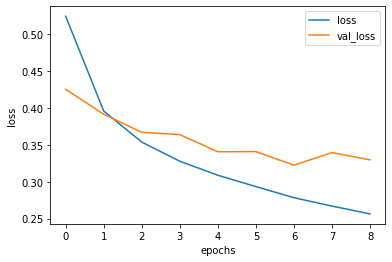

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['loss', 'val_loss'])
plt.show()

In [15]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.3223 - accuracy: 0.8852


[0.32234472036361694, 0.8851666450500488]

In [17]:
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

# 현재 셀의 loss 및 accuracy와 윗 셀의 loss 및 accuracy가 같은 이유
# 둘 다 Callback을 통해 나온 모델
# 현재 셀의 모델은 earlystopping을 통해 restore_best_weights를 True로 바꿈으로써 
# 검증 손실이 제일 낮을 때 저장된 모델
# 윗 셀은 ModelCheckpoint를 통해 검증손실이 가장 낮을 때 만들어진 모델

# 즉, 둘은 같은 모델을 불러온 것이 된다.

375/375 [==============================] - 1s 2ms/step - loss: 0.3223 - accuracy: 0.8852


[0.32234472036361694, 0.8851666450500488]